<a href="https://colab.research.google.com/github/naman3309/MajorProject/blob/colab/CYBER_VIGILANTE_v1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas
Isolation Forest
Unsupervised Anomaly Detection

In [ ]:

import pandas as pd
import random
from datetime import datetime, timedelta
from sklearn.ensemble import IsolationForest


In [ ]:
# Generate synthetic data
activities = ['login', 'file_access', 'data_download', 'logout', 'restricted_access']

# Create random activity logs
data = []
for i in range(1000):
    user = f'User{i+1}'
    activity = random.choice(activities)
    timestamp = datetime.now() - timedelta(minutes=random.randint(0, 10000))  # Random timestamp generation
    data.append({'user_id': user, 'activity': activity, 'timestamp': timestamp})

# Create DataFrame
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Display the first few rows of the dataset
print("Synthetic Data:")
print(df.head())


Synthetic Data:
      user_id           activity                  timestamp
0       User1  restricted_access 2024-12-04 07:29:59.958763
1       User2             logout 2024-12-04 07:00:59.958781
2       User3      data_download 2024-12-09 09:41:59.958788
3       User4      data_download 2024-12-08 13:36:59.958792
4       User5  restricted_access 2024-12-05 07:06:59.958796
..        ...                ...                        ...
995   User996              login 2024-12-09 23:01:59.964005
996   User997      data_download 2024-12-03 23:07:59.964011
997   User998             logout 2024-12-07 15:13:59.964017
998   User999      data_download 2024-12-04 14:19:59.964023
999  User1000        file_access 2024-12-05 15:41:59.964029

[1000 rows x 3 columns]


In [ ]:
# Extract useful features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Display preprocessed data
print("\nPreprocessed Data:")
print(df.head())



Preprocessed Data:
      user_id           activity                  timestamp  hour  day_of_week
0       User1  restricted_access 2024-12-04 07:29:59.958763     7            2
1       User2             logout 2024-12-04 07:00:59.958781     7            2
2       User3      data_download 2024-12-09 09:41:59.958788     9            0
3       User4      data_download 2024-12-08 13:36:59.958792    13            6
4       User5  restricted_access 2024-12-05 07:06:59.958796     7            3
..        ...                ...                        ...   ...          ...
995   User996              login 2024-12-09 23:01:59.964005    23            0
996   User997      data_download 2024-12-03 23:07:59.964011    23            1
997   User998             logout 2024-12-07 15:13:59.964017    15            5
998   User999      data_download 2024-12-04 14:19:59.964023    14            2
999  User1000        file_access 2024-12-05 15:41:59.964029    15            3

[1000 rows x 5 columns]


In [ ]:
# Prepare data by cleaning and classifing it.
features = df[['hour', 'day_of_week']]

# Using Isolation Forest Algo for anomaly detection
cont = random.randint(0,28)/100
print(cont)
model = IsolationForest(contamination=cont, random_state=42)
df['anomaly'] = model.fit_predict(features)

# Mark anomalies
df['anomaly_flag'] = df['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
count = df['anomaly_flag'].value_counts()

# Display results with anomaly flags
print("\nAnomaly Detection Results:")
print(df[['user_id', 'activity', 'hour', 'day_of_week', 'anomaly_flag']])
print(count)


0.24

Anomaly Detection Results:
      user_id           activity  hour  day_of_week anomaly_flag
0       User1  restricted_access     7            2       Normal
1       User2             logout     7            2       Normal
2       User3      data_download     9            0      Anomaly
3       User4      data_download    13            6       Normal
4       User5  restricted_access     7            3       Normal
..        ...                ...   ...          ...          ...
995   User996              login    23            0      Anomaly
996   User997      data_download    23            1      Anomaly
997   User998             logout    15            5       Normal
998   User999      data_download    14            2       Normal
999  User1000        file_access    15            3       Normal

[1000 rows x 5 columns]
anomaly_flag
Normal     761
Anomaly    239
Name: count, dtype: int64


In [ ]:
# Define risk weights for activities
activity_risk = {
    'login': 1,
    'file_access': 2,
    'data_download': 3,
    'restricted_access': 5,
    'logout': 0
}

# Assign risk scores to each activity
df['risk_score'] = df['activity'].map(activity_risk)

# Aggregate risk score for each user
user_risk = df.groupby('user_id')['risk_score'].sum().reset_index()
user_risk.columns = ['user_id', 'total_risk_score']

# Display user risk scores
print("\nUser Risk Scores:")
print(user_risk)



User Risk Scores:
      user_id  total_risk_score
0       User1                 5
1      User10                 5
2     User100                 0
3    User1000                 2
4     User101                 3
..        ...               ...
995   User995                 2
996   User996                 1
997   User997                 3
998   User998                 0
999   User999                 3

[1000 rows x 2 columns]


In [ ]:
# Define a risk threshold for alerts
RISK_THRESHOLD = 15

# Identify high-risk users
high_risk_users = user_risk[user_risk['total_risk_score'] > RISK_THRESHOLD]

# Display alerts for high-risk users
print("\nAlerts for High-Risk Users:")
for _, row in high_risk_users.iterrows():
    user_id = row['user_id']
    risk_score = row['total_risk_score']
    print(f"ALERT: User {user_id} has a high risk score of {risk_score}!")



Alerts for High-Risk Users:
ALERT: User User1 has a high risk score of 243!
ALERT: User User10 has a high risk score of 229!
ALERT: User User2 has a high risk score of 241!
ALERT: User User3 has a high risk score of 276!
ALERT: User User4 has a high risk score of 232!
ALERT: User User5 has a high risk score of 200!
ALERT: User User6 has a high risk score of 150!
ALERT: User User7 has a high risk score of 250!
ALERT: User User8 has a high risk score of 219!
ALERT: User User9 has a high risk score of 208!


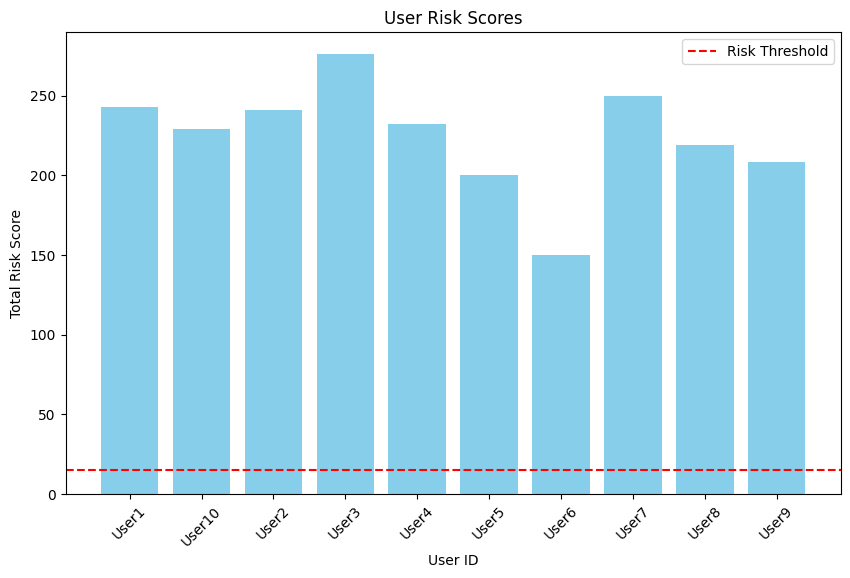

In [ ]:
import matplotlib.pyplot as plt

# Plot total risk scores for users
plt.figure(figsize=(10, 6))
plt.bar(user_risk['user_id'], user_risk['total_risk_score'], color='skyblue')
plt.axhline(y=RISK_THRESHOLD, color='r', linestyle='--', label='Risk Threshold')
plt.xlabel('User ID')
plt.ylabel('Total Risk Score')
plt.title('User Risk Scores')
plt.legend()
plt.xticks(rotation=45)
plt.show()

